## Polynomial Regression on Boston Housing Dataset

**In this notebook we do a comparative study of Linear Regression and Polynomial Regression accuracy on the Boston Housing Dataset**

This data was originally a part of UCI Machine Learning Repository and has been removed now. This data also ships with the scikit-learn library. 
There are 506 samples and 13 feature variables in this data-set. The objective is to predict the value of prices of the house using the given features.

The description of all the features is given below:

  **CRIM**: Per capita crime rate by town

  **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

  **INDUS**: Proportion of non-retail business acres per town

  **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

  **NOX**: Nitric oxide concentration (parts per 10 million)

  **RM**: Average number of rooms per dwelling

  **AGE**: Proportion of owner-occupied units built prior to 1940

  **DIS**: Weighted distances to five Boston employment centers

  **RAD**: Index of accessibility to radial highways

  **TAX**: Full-value property tax rate per $10,000

  **B**: 1000(Bk - 0.63)², where Bk is the proportion of [people of African American descent] by town

  **LSTAT**: Percentage of lower status of the population

  **MEDV**: Median value of owner-occupied homes in $1000s
  
  
  



I**mport the required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

**Load the data into pandas dataframe**

In [4]:
boston = pd.read_csv("data/Boston.csv", sep=",")
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
usa = pd.read_csv("data/USA_Housing.csv", sep=",")
usa.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**The target values is missing from the data. Create a new column of target values and add it to dataframe in a column called MEDV**

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data preprocessing**

Check for missing values in all the columns

In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
boston.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Data Visualization**

In [8]:
import matplotlib.pyplot as plt

/var/folders/tf/37nkwncn1y90l973_5n_pmfc0000gn/T/ipykernel_53098/1192399422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston["medv"])


<Axes: xlabel='medv', ylabel='Density'>

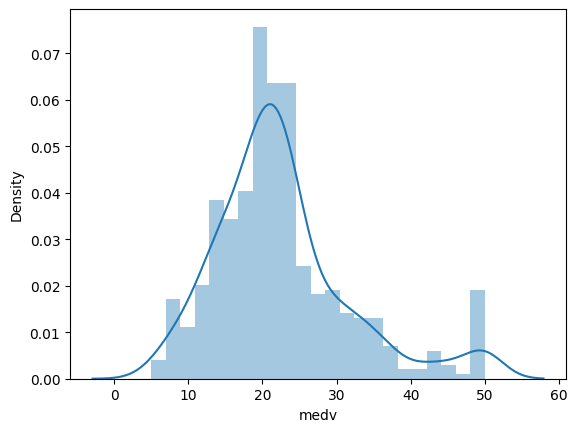

In [16]:
sns.distplot(boston["medv"])


**Correlation matrix**

Analyze the correlation matrix. Plot a heatmap

* From correlation plot: which are the columns that are more correlated with **MEDV**
* There are two features highly correlated. Identify them and drop one of them in order to avoid multi-colinearity

In [11]:
boston.corr()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


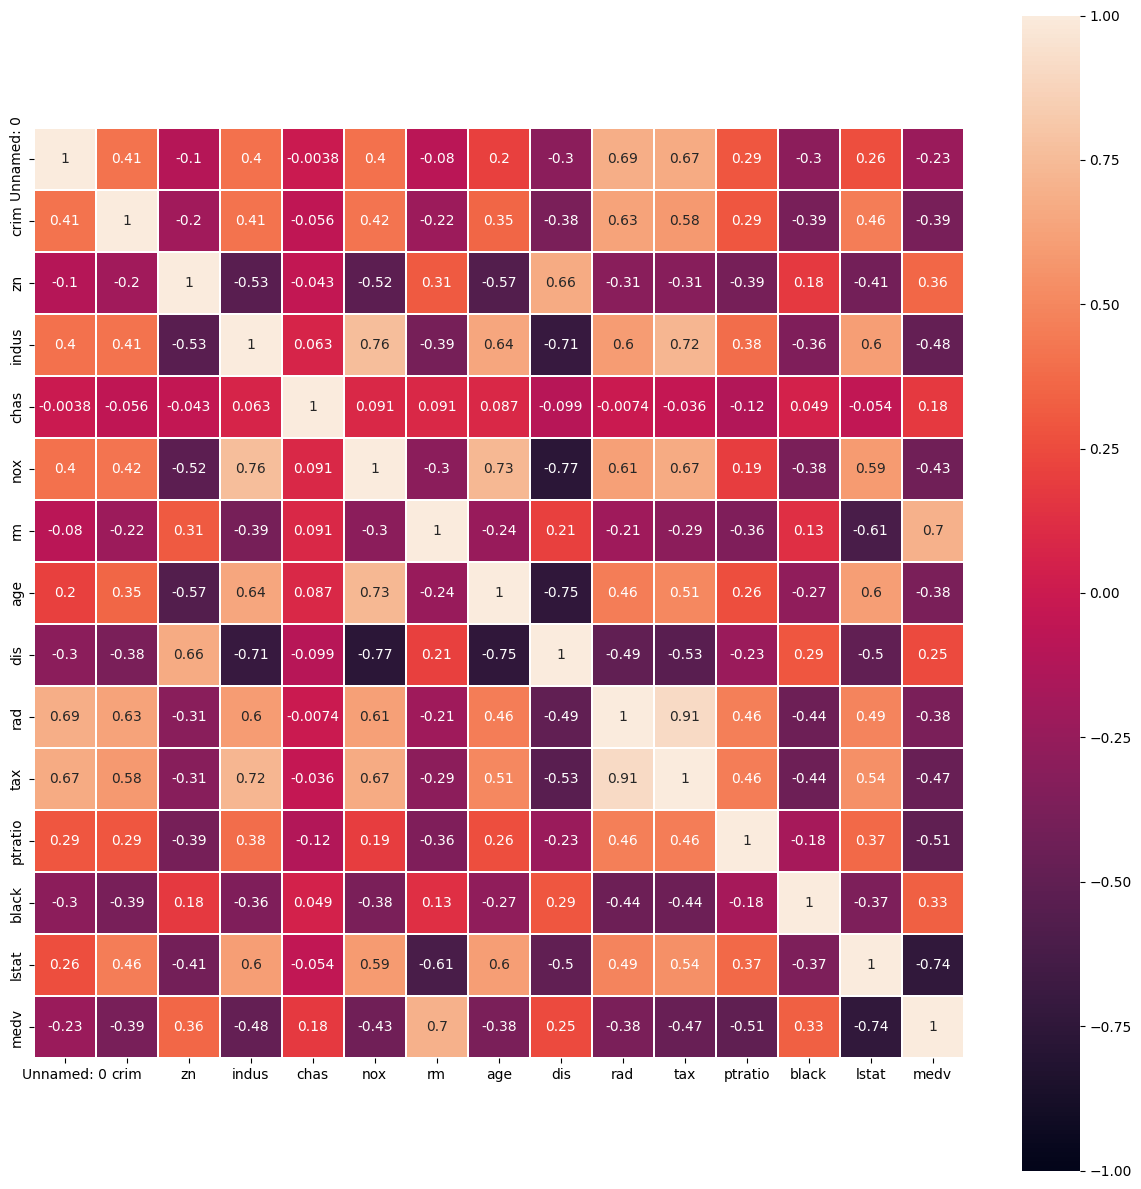

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(boston.corr(),
            vmin=-1,
            vmax=1,
            square=True,
            linewidths=.1,
            annot=True);

In [14]:
# NOS CARGAMOS LA COLUMNA TAX PORQUE HAY MUCHA CORRELACION ENTRE RAD Y TAX

### Draw 2 scatter plots to see the relationship between **MEDV** and **LSTAT** and **RM**

<Axes: xlabel='lstat', ylabel='medv'>

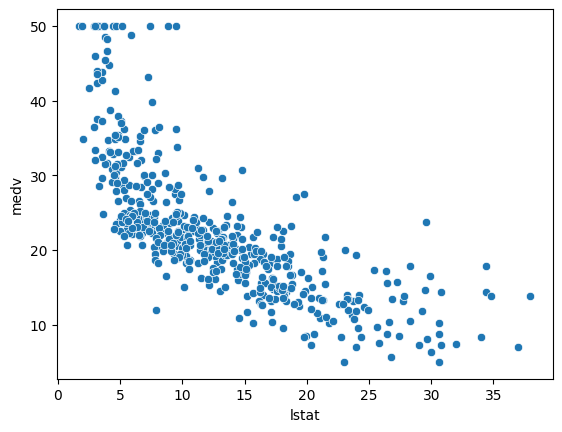

In [30]:
sns.scatterplot(y=boston["medv"], x=boston["lstat"])

<Axes: xlabel='rm', ylabel='medv'>

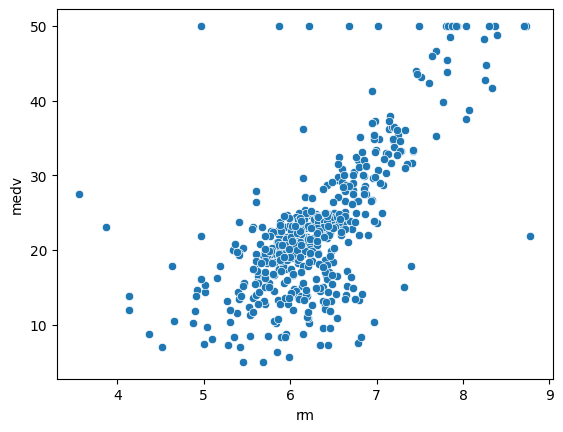

In [31]:
sns.scatterplot(y=boston["medv"], x=boston["rm"])

**Prepare the data for training**
Create a dataframe X including **LSTAT** and **RM** columns.
Y should be a pandas series including target values **'MEDV'**


In [32]:
#Getting all Coulmn names
boston.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [33]:
# Columns as Features
X = boston[['lstat', 'rm']]
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [35]:
y = boston['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [16]:
# LAS X TIENEN DOS COLUMNAS, LAS Y SON UNA SERIE

**Split the data into training and testing sets**

Splits the training and test data set in 80% : 20%. Assign random_state to any value. This ensures consistency. Print the sahes of the resulting objects

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [38]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (506, 2)
Train features shape: (404, 2)
Train target shape: (404,)
Test features shape: (102, 2)
Test target shape: (102,)


# **Linear Regression**

Build a linear regression model with sklearn LinearRegression.
We'll use Mean Squared error and R2 score to evaluate our model, so be sure to make the needed imports.

Import the necessary functions and train a LinearRegression model

In [39]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [40]:
#creating LinearRegression Object
lm = LinearRegression()

In [41]:
#Training the Data Model
lm.fit(X_train, y_train)

LinearRegression()

In [42]:
#con esto sacamos los valores de las m de la ecuacion ::  y= m*col1 + m*col2.....+c (ecuacion de la recta pero con los 5 columnas)
lm.coef_

array([-0.63249856,  5.46509877])

In [43]:
 #el intercepto representa la C en la euacion de la recta 
lm.intercept_

-3.8411770790048934

**Evaluate the model performance in the training and testing sets**

In [46]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, lm.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, lm.predict(X_train)))
print('MSE train', mean_squared_error(y_train, lm.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, lm.predict(X_train))))
print('R2 score train', r2_score(y_train, lm.predict(X_train)))

MAE train 3.9404902234222137
MAPE train 0.20798676056317764
MSE train 30.39185519321462
RMSE train 5.512880843371696
R2 score train 0.6501592679428922


In [47]:
# METRICAS DE TEST, LAS BUENAS, HACEOS LA PREGUNTA: QUE TAL LO ESTAMOS HACIENDO?
print('MAE test', mean_absolute_error(y_test, lm.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, lm.predict(X_test)))
print('MSE test', mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, lm.predict(X_test))))
print('R2 score test', r2_score(y_test, lm.predict(X_test)))

MAE test 3.8987597213823584
MAPE test 0.2074364015370495
MSE test 31.243290601783627
RMSE test 5.589569804715174
R2 score test 0.5739577415025858


**Lets see the model performance visually. Let's plot y_test vs y_pred**

Plotting the y_test vs y_pred. Ideally should have been a straight line

<Axes: xlabel='medv'>

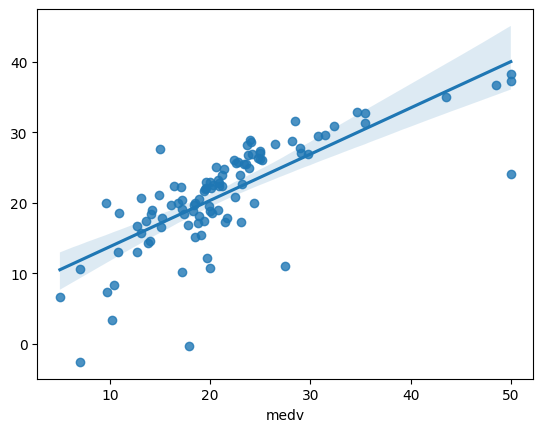

In [49]:
# ESTA OS LA DEJO POR QUE TODOS ODIAMOS ESTE PLOT
y_pred = lm.predict(X_test)
sns.regplot(x=y_test, y=y_pred)

# **Polynomial Regression**

We can see that **LSTAT** doesn't vary exactly in a linear way. Let's apply the Polynomial Regression with **degree 2** and test. 

To generate the higher order degrees, we use PolyniomialFeatures class from sklearn library. 

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = pd.DataFrame(poly_feats.transform(X))
X_poly

,0,1,2,3,4,5
0,1.0,4.98,6.575,24.8004,32.74350,43.230625
1,1.0,9.14,6.421,83.5396,58.68794,41.229241
2,1.0,4.03,7.185,16.2409,28.95555,51.624225
3,1.0,2.94,6.998,8.6436,20.57412,48.972004
4,1.0,5.33,7.147,28.4089,38.09351,51.079609
...,...,...,...,...,...,...
501,1.0,9.67,6.593,93.5089,63.75431,43.467649
502,1.0,9.08,6.120,82.4464,55.56960,37.454400
503,1.0,5.64,6.976,31.8096,39.34464,48.664576
504,1.0,6.48,6.794,41.9904,44.02512,46.158436


In [54]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [55]:
pol_reg.score(X_poly, y)

0.7572658522486412

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=42)

In [58]:
print("Total features shape:", X_poly.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (506, 6)
Train features shape: (404, 6)
Train target shape: (404,)
Test features shape: (102, 6)
Test target shape: (102,)


In [60]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, pol_reg.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg.predict(X_train)))
print('MSE train', mean_squared_error(y_train, pol_reg.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg.predict(X_train))))
print('R2 score train', r2_score(y_train, pol_reg.predict(X_train)))

MAE train 3.190998491444752
MAPE train 0.16178946210982578
MSE train 21.097445060641377
RMSE train 4.593195517354054
R2 score train 0.7571472495631909


**Did the model improve using the Polynomial model?**

In [61]:
# transformamos el test
X_poly_test = X_test

In [63]:
print('MAE test', mean_absolute_error(y_test, pol_reg.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg.predict(X_test)))
print('MSE test', mean_squared_error(y_test, pol_reg.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg.predict(X_test))))
print('R2 score test', r2_score(y_test, pol_reg.predict(X_test)))

MAE test 2.861580773922768
MAPE test 0.1579726045111564
MSE test 18.091527040793974
RMSE test 4.253413575094006
R2 score test 0.7532988718004345


In [ ]:
# REPETIR CON POLINOMIO DE GRADO 3

In [64]:
X

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly3 = pd.DataFrame(poly_feats.transform(X))
X_poly3

,0,1,2,3,4,5,6,7,8,9
0,1.0,4.98,6.575,24.8004,32.74350,43.230625,123.505992,163.062630,215.288513,284.241359
1,1.0,9.14,6.421,83.5396,58.68794,41.229241,763.551944,536.407772,376.835263,264.732956
2,1.0,4.03,7.185,16.2409,28.95555,51.624225,65.450827,116.690866,208.045627,370.920057
3,1.0,2.94,6.998,8.6436,20.57412,48.972004,25.412184,60.487913,143.977692,342.706084
4,1.0,5.33,7.147,28.4089,38.09351,51.079609,151.419437,203.038408,272.254316,365.065966
...,...,...,...,...,...,...,...,...,...,...
501,1.0,9.67,6.593,93.5089,63.75431,43.467649,904.231063,616.504178,420.332166,286.582210
502,1.0,9.08,6.120,82.4464,55.56960,37.454400,748.613312,504.571968,340.085952,229.220928
503,1.0,5.64,6.976,31.8096,39.34464,48.664576,179.406144,221.903770,274.468209,339.484082
504,1.0,6.48,6.794,41.9904,44.02512,46.158436,272.097792,285.282778,299.106665,313.600414


In [67]:
pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly3, y)
pol_reg3.score(X_poly3, y)

0.7710626324710493

In [ ]:
aa

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly3,y, test_size = 0.2, random_state=42)

In [69]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, pol_reg3.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg3.predict(X_train)))
print('MSE train', mean_squared_error(y_train, pol_reg3.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg3.predict(X_train))))
print('R2 score train', r2_score(y_train, pol_reg3.predict(X_train)))

print("-------------------------------------------")

print('MAE test', mean_absolute_error(y_test, pol_reg3.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg3.predict(X_test)))
print('MSE test', mean_squared_error(y_test, pol_reg3.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg3.predict(X_test))))
print('R2 score test', r2_score(y_test, pol_reg3.predict(X_test)))

MAE train 3.0534672549682242
MAPE train 0.15479553408954386
MSE train 19.83747865898466
RMSE train 4.453928452387247
R2 score train 0.7716507264164683
-------------------------------------------
MAE test 2.7714655540514
MAPE test 0.15721330098136665
MSE test 17.304067104645195
RMSE test 4.159815753689722
R2 score test 0.7640368959717394


In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly4 = pd.DataFrame(poly_feats.transform(X))

pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly4, y)
pol_reg4.score(X_poly4, y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly4,y, test_size = 0.2, random_state=42)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('MAE train', mean_absolute_error(y_train, pol_reg4.predict(X_train)))
print('MAPE train', mean_absolute_percentage_error(y_train, pol_reg4.predict(X_train)))
print('MSE train', mean_squared_error(y_train, pol_reg4.predict(X_train)))
print('RMSE train', np.sqrt(mean_squared_error(y_train, pol_reg4.predict(X_train))))
print('R2 score train', r2_score(y_train, pol_reg4.predict(X_train)))

print("----------------------------------------------------------------------------------------")

print('MAE test', mean_absolute_error(y_test, pol_reg4.predict(X_test)))
print('MAPE test', mean_absolute_percentage_error(y_test, pol_reg4.predict(X_test)))
print('MSE test', mean_squared_error(y_test, pol_reg4.predict(X_test)))
print('RMSE test', np.sqrt(mean_squared_error(y_test, pol_reg4.predict(X_test))))
print('R2 score test', r2_score(y_test, pol_reg4.predict(X_test)))



MAE train 3.0534672549682242
MAPE train 0.15479553408954386
MSE train 19.83747865898466
RMSE train 4.453928452387247
R2 score train 0.7716507264164683
----------------------------------------------------------------------------------------
MAE test 2.7714655540514
MAPE test 0.15721330098136665
MSE test 17.304067104645195
RMSE test 4.159815753689722
R2 score test 0.7640368959717394


COMO EL POLY REG 4 OVERFITEA (Y MUCHO!!!) SACAMOS LAS VISUALIZACIONES PARA LOS RESULTADOS DE GRADO 3

OS LAS DEJO:

In [73]:
pol_reg3

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for degree in range(1, 10):
    poly_feats = PolynomialFeatures(degree = degree)
    poly_feats.fit(X)
    X_poly = poly_feats.transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    score = pol_reg.score(X_poly, y)
    print(f"Para el degree {degree}, el score es de: {score}")

In [75]:
from sklearn.preprocessing import PolynomialFeatures

X_all_polly = pol_reg3.transform(X)

AttributeError: 'LinearRegression' object has no attribute 'transform'

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

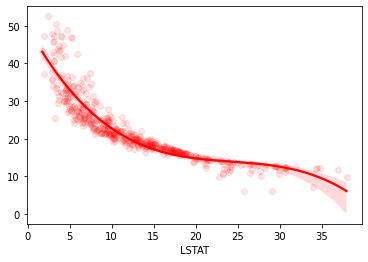

In [41]:

sns.regplot(X['LSTAT'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})

c:\Users\josel\anaconda3\envs\new_basic_ds\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

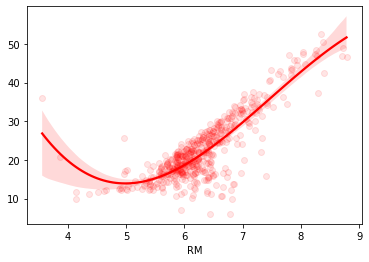

In [42]:

sns.regplot(X['RM'], pol_reg_3.predict(X_all_polly), color='red', order=3, scatter_kws={"alpha":0.1})